# Practical Session - Graph Mining - Python

## 2 NetworkX

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community
import sklearn
import sklearn.metrics
from typing import List, Set


In [2]:
def drawg(g: nx.Graph):
    nx.draw(g, with_labels=True)
    plt.show()


## 3 Creating a graph

### Tests

In [3]:
G = nx.Graph()

In [4]:
G.add_node(1)
G.add_nodes_from([i for i in range(10)])
G.add_edge(1, 2)
G.add_edges_from([(i, 9 - i) for i in range(10)])

In [5]:
(
    list(G.nodes),
    list(G.edges),
    [(n, G.degree[n]) for n in G.nodes]
)


([1, 0, 2, 3, 4, 5, 6, 7, 8, 9],
 [(1, 2), (1, 8), (0, 9), (2, 7), (3, 6), (4, 5)],
 [(1, 2),
  (0, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)])

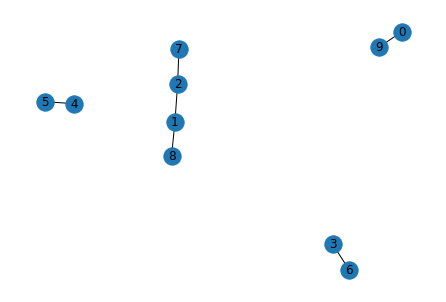

In [6]:
drawg(G)


### Erdos-Renyi graph

In [7]:
def erdos_renyi(n: int, p: float) -> nx.Graph:
    G = nx.Graph()

    G.add_nodes_from(range(0, n))

    for i in range(n - 1):
        for j in range(i + 1, n):
            if random.random() < p:
                G.add_edge(i, j)

    return G


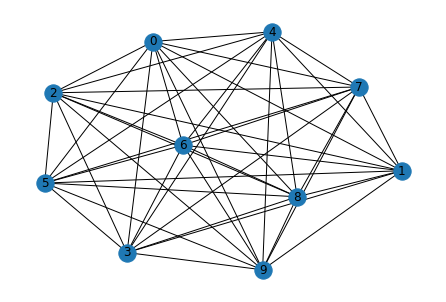

In [8]:
I = erdos_renyi(10, 1)
drawg(I)

In [9]:
largest_cc = max(nx.connected_components(I), key=len)
largest_cc


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

> In the particular case where np = 1, what can you say of the size of the largest connected component ?

if np = 1 then the graph is complete, so the largest connected components have a size of n - 1

In [10]:
from time import time


def timeof(f):
    start = time()
    t = f()
    end = time()
    return t, end - start

for i in range(9):
    n = 3 ** i
    print("n =", n)
    _, tnx = timeof(lambda: nx.erdos_renyi_graph(n, 0.2))
    _, tps = timeof(lambda: erdos_renyi(n, 0.2))
    print("time nx:   ", tnx)
    print("time perso:", tps)


n = 1
time nx:    0.0
time perso: 0.0
n = 3
time nx:    0.0
time perso: 0.0
n = 9
time nx:    0.0
time perso: 0.0
n = 27
time nx:    0.0
time perso: 0.0
n = 81
time nx:    0.0009984970092773438
time perso: 0.0009992122650146484
n = 243
time nx:    0.017998933792114258
time perso: 0.009999990463256836
n = 729
time nx:    0.0899972915649414
time perso: 0.07400226593017578
n = 2187
time nx:    0.9629983901977539
time perso: 0.8360004425048828
n = 6561
time nx:    9.680000305175781
time perso: 11.762022733688354


Outputs:
```
n = 1
time nx:    0.0
time perso: 0.0
n = 3
time nx:    0.0
time perso: 0.0
n = 9
time nx:    0.0
time perso: 0.0
n = 27
time nx:    0.00099945068359375
time perso: 0.0
n = 81
time nx:    0.002996683120727539
time perso: 0.0019986629486083984
n = 243
time nx:    0.012992143630981445
time perso: 0.010994195938110352
n = 729
time nx:    0.12293791770935059
time perso: 0.09615755081176758
n = 2187
time nx:    1.4097251892089844
time perso: 1.0922727584838867
n = 6561
time nx:    14.006853342056274
time perso: 12.404988050460815
```

## 4 Loading a graph

In [11]:
G1 = nx.read_edgelist("./graph0.txt", nodetype=int)

In [12]:
G1.add_edge(5, 10)

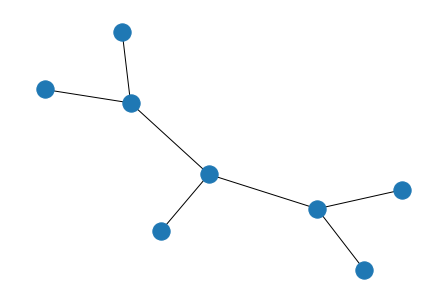

In [13]:
nx.draw(G1)

## 5 Drawing a graph

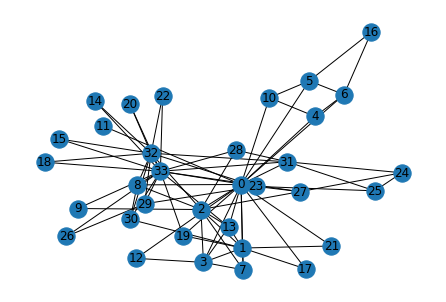

In [14]:
drawg(nx.karate_club_graph())


> Which layout does nx.draw() use?

``nx.drawing.spring_layout``

## 6 Degree distribution

karate_club_graph


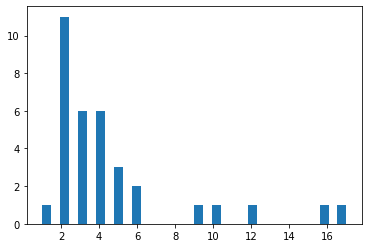

In [15]:
def plot_degree_dist(g: nx.Graph, fig = None) -> None:
    x = [d for (_, d) in g.degree]
    if fig == None:
        plt.hist(x, len(g.degree))
    else:
        fig.hist(x, len(g.degree))


print("karate_club_graph")
plot_degree_dist(nx.karate_club_graph())
plt.show()


erdos_renyi(n, 0.2)


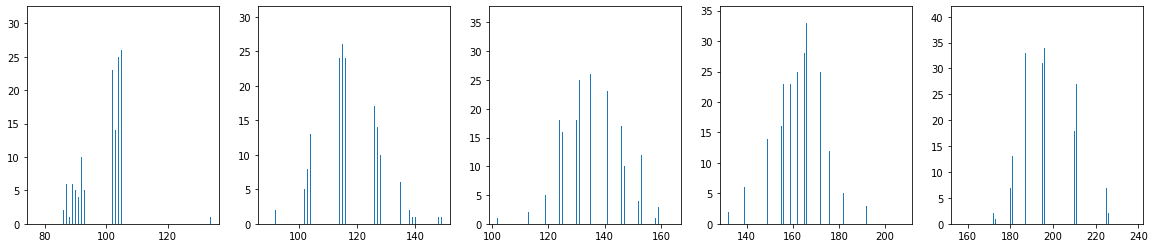

erdos_renyi(n, 0.5)


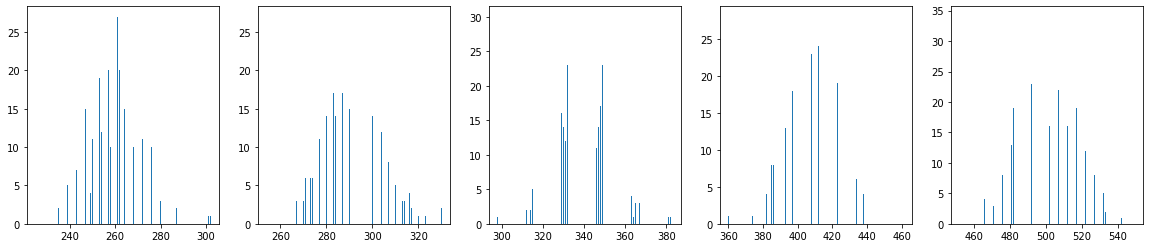

In [16]:

_, axs = plt.subplots(1, 5, figsize=(20, 4))

print("erdos_renyi(n, 0.2)")

for i in range(1, 6):
    n = 500 + 20 * i ** 2
    plot_degree_dist(erdos_renyi(n, 0.2), axs[i - 1])

plt.show()

_, axs = plt.subplots(1, 5, figsize=(20, 4))

print("erdos_renyi(n, 0.5)")

for i in range(1, 6):
    n = 500 + 20 * i ** 2
    plot_degree_dist(erdos_renyi(n, 0.5), axs[i - 1])

plt.show()


connected_watts_strogatz_graph(n, k, 0.2)


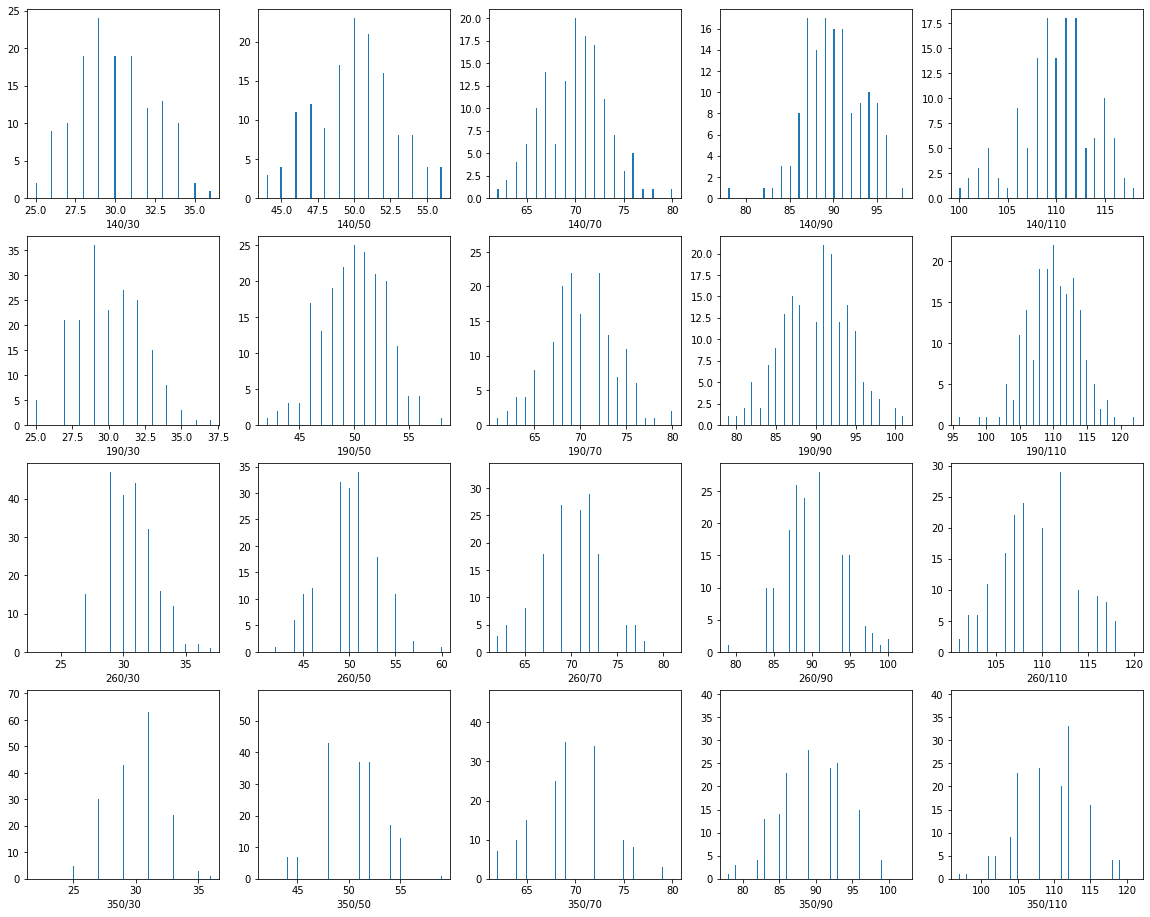

In [17]:

_, axs = plt.subplots(4, 5, figsize=(20, 16))

print("connected_watts_strogatz_graph(n, k, 0.2)")

for i in range(2, 6):
    for j in range(1, 6):
        n = 100 + 10 * i ** 2
        k = 10 + 10 * j * 2
        fig = axs[i - 2, j - 1]
        fig.set_xlabel(f"{n}/{k}")
        plot_degree_dist(nx.connected_watts_strogatz_graph(n, k, 0.2), fig)

plt.show()

barabasi_albert_graph(n, m)


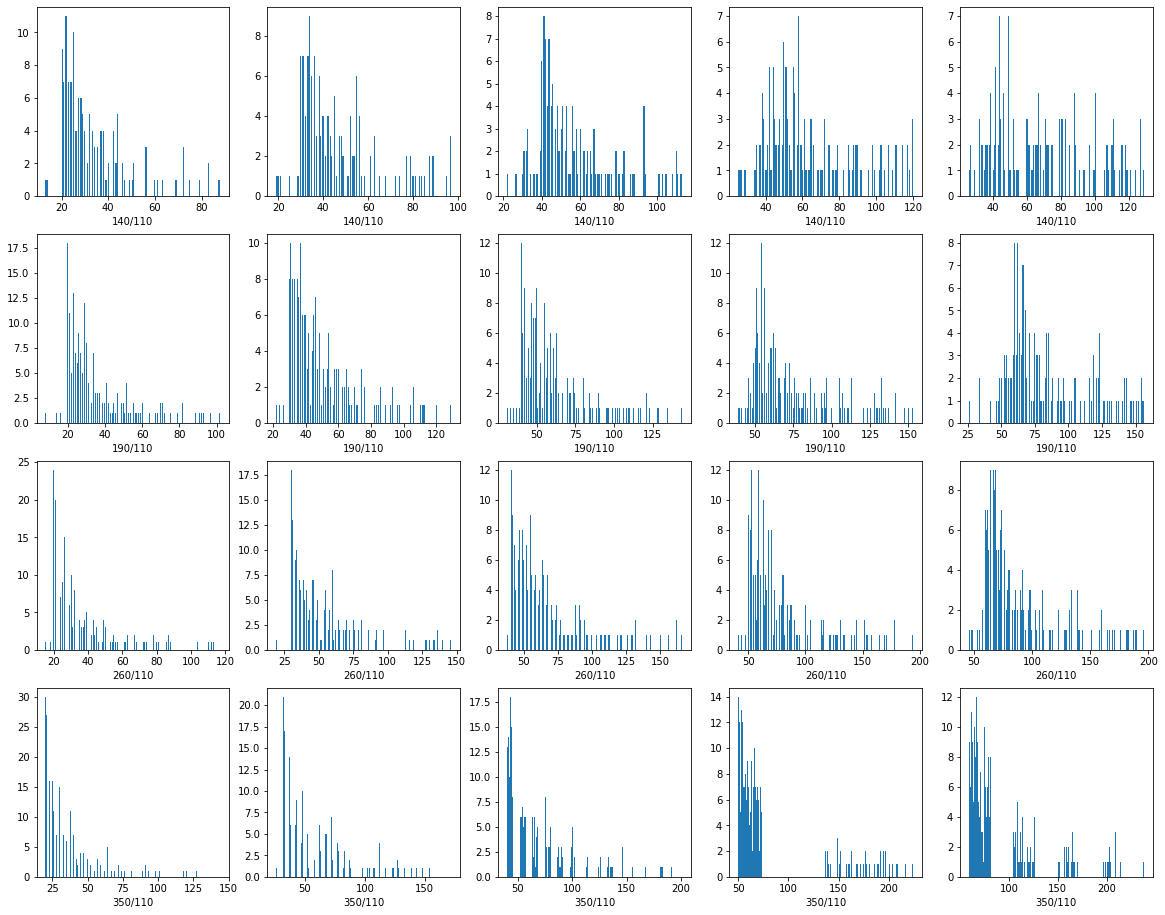

In [18]:

_, axs = plt.subplots(4, 5, figsize=(20, 16))

print("barabasi_albert_graph(n, m)")

for i in range(2, 6):
    for j in range(1, 6):
        n = 100 + 10 * i ** 2
        m = 10 + j * 10
        fig = axs[i - 2, j - 1]
        fig.set_xlabel(f"{n}/{k}")
        plot_degree_dist(nx.barabasi_albert_graph(n, m), fig)

plt.show()


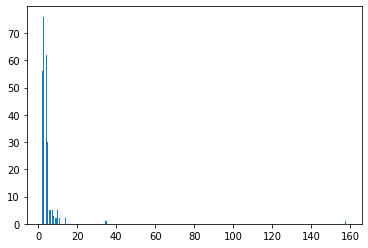

In [19]:
plot_degree_dist(nx.LFR_benchmark_graph(250, 3, 1.5, 0.1, average_degree=5, min_community=20,
                       seed=10))
plt.show()


> What can you see ?

A normal distribution


## 7 Community detection

In [20]:
LFR = nx.LFR_benchmark_graph(250, 3, 1.5, 0.1, average_degree=5, min_community=20,
                       seed=10)


In [21]:
communities_gt = nx.get_node_attributes(LFR, "community")
communities_gt = [communities_gt[k] for k in communities_gt]

In [22]:
def compute_community_map(comp: List[Set[int]]) -> List[int]:
    # get the number of nodes
    n = max(max(s) for s in comp) + 1
    nodes = [-1 for _ in range(n)]

    for i in range(len(comp)):
        for node in comp[i]:
            nodes[node] = i

    return nodes

In [23]:
communities_gt_map = compute_community_map(communities_gt)

In [24]:
def get_diff(comp: List[Set[int]]) -> float:
    comp_map = compute_community_map(comp)
    return sklearn.metrics.normalized_mutual_info_score(communities_gt_map, comp_map)

### label_propagation_communities

In [25]:
communities_comp1 = list(community.label_propagation_communities(LFR))

In [26]:
get_diff(communities_comp1)

0.43593118951641463

### greedy_modularity_communities

In [27]:
communities_comp2 = community.greedy_modularity_communities(LFR)
communities_comp2 = [set(k) for k in communities_comp2]

In [28]:
get_diff(communities_comp2)

0.5310905089914274

## 8 An example: the WormNet v.3-GS graph

In [29]:
WNG = nx.read_edgelist("WormNet.v3.benchmark.graph.txt")

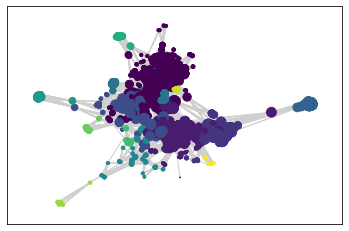

In [30]:
def draw_largest_con_comp(g: nx.Graph) -> None:
    # clone the graph to allow update
    g = g.copy()
    # get the largest connected components (LCC)
    largest_cc = max(nx.connected_components(g), key=len)

    # remove the node from the LCC if d(n) < 10
    g.remove_nodes_from((node for node in largest_cc if g.degree[node] < 10))

    # compute the subgraph layout
    sg = g.subgraph(largest_cc)
    pos=nx.spring_layout(sg)
    
    # set a color for each node depending of its community
    communities = community.greedy_modularity_communities(sg)
    color_map = {}

    i = 0
    for c in communities:
        for node in c:
            color_map[node] = i
        i += 1

    colors = [color_map[node] for node in sg.nodes()]

    # set a size for each node depending of its centrality
    centralities = nx.centrality.degree_centrality(sg)

    scale = 300 / max(centralities[node] for node in sg.nodes())
    scales = [centralities[node] * scale for node in sg.nodes()]

    # draw the network
    nx.draw_networkx(sg, pos=pos, with_labels=False, node_color = colors, node_size = scales, edge_color="#cfcfcf")
    plt.show()


draw_largest_con_comp(WNG)
